In [1]:
#D.S Imports
import pandas as pd
import numpy as np
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Statistics
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
#Scikit-Learn
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import main dataset
df = pd.read_csv('churn_clean.csv')

In [5]:
#display data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [7]:
#check for null values
if df.isnull().sum().sum() ==0:
    print("No null values found.")
else:
    print("Null values found.")

Null values found.


In [9]:
#check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [11]:
#cleaning our dataset
#Step 1 rename columns
col_head = {'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'Yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'MonthlyCharge',
    'Bandwidth_GB_Year': 'Bandwidth_GB_Year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

In [13]:
#print columns to confirm change
df.columns

Index(['case_order', 'customer_id', 'interaction', 'UID', 'city', 'state',
       'county', 'zip', 'lat', 'lng', 'population', 'area', 'TimeZone', 'job',
       'children', 'age', 'income', 'marital_type', 'gender', 'churn',
       'outage_sec_perweek', 'email', 'contacts', 'Yearly_equip_failure',
       'techie', 'contract', 'port_modem', 'tablet', 'internet_service',
       'phone', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'payment_method', 'tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'active_listening'],
      dtype='object')

array([[<Axes: title={'center': 'case_order'}>,
        <Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'lng'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'outage_sec_perweek'}>,
        <Axes: title={'center': 'email'}>],
       [<Axes: title={'center': 'contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>],
       [<Axes: title={'center': 'timely_response'}>,
        <Axes: title={'center': 'timely_fixes'}>,
        <Axes: title={'center': 'timely_replacements'}>,
        <Axes: title={'center': 'reliability'}>,
        <Axes: title={'center': 'options'}>],
       [<Axes: title={'center': 'respectful_res

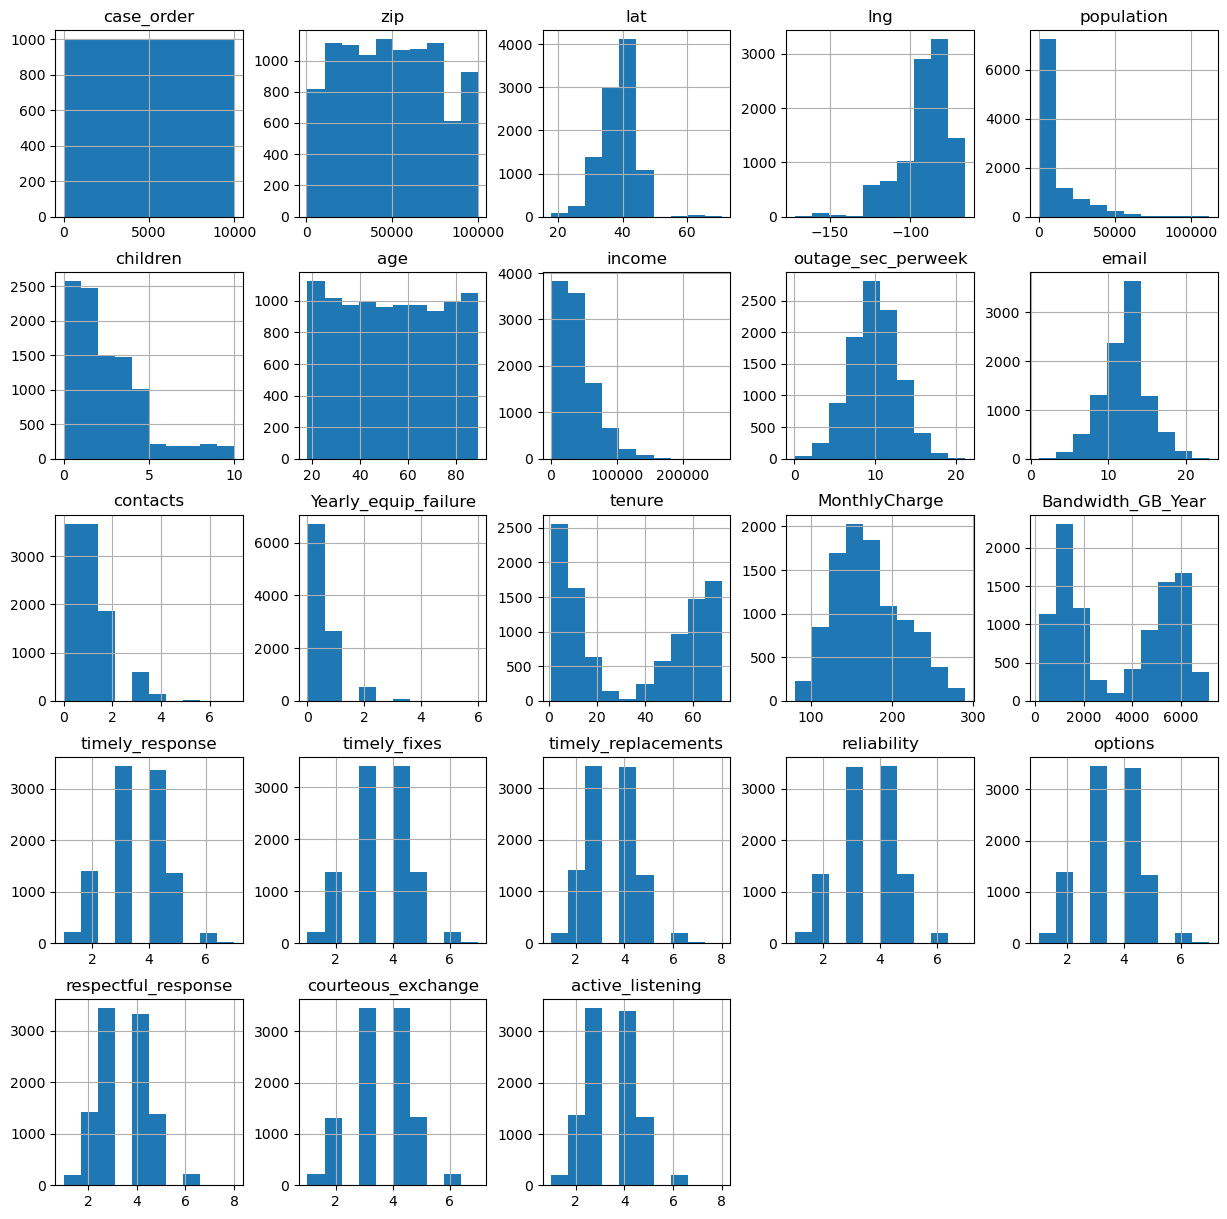

In [15]:
#histogram
df.hist(figsize = (15,15))

In [17]:
#check for outliers and remove
print(df.shape)
df= df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(10000, 50)
(8950, 50)


In [19]:
#drop less meaningful columns
df = df.drop(columns=['timely_response','timely_fixes','timely_replacements','reliability','options','respectful_response','courteous_exchange','active_listening', 'case_order', 'customer_id', 'interaction', 'UID', 'city', 'state', 'county', 'zip', 'lat', 'lng',
                      'TimeZone', 'job','marital_type', 'contract', 'port_modem', 'tablet', 'internet_service', 'phone', 'multiple_lines',
                      'online_security', 'online_backup', 'area','device_protection', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                      'payment_method'])

In [21]:
#confirm changes
df.head()

,population,children,age,income,gender,churn,outage_sec_perweek,email,contacts,Yearly_equip_failure,techie,tech_support,tenure,MonthlyCharge,Bandwidth_GB_Year
1,10446,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,No,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,No,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,No,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,Yes,1.670972,149.948316,271.493436
5,17701,3,83,22660.20,Female,No,8.420993,15,3,1,No,No,7.000994,185.007692,1039.357983


In [23]:
#show statistical information of continuous variables
df.describe()

,population,children,age,income,outage_sec_perweek,email,contacts,Yearly_equip_failure,tenure,MonthlyCharge,Bandwidth_GB_Year
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,8508.409274,1.941453,53.161341,38329.400298,10.009065,12.021676,0.941676,0.374749,34.423473,172.783589,3379.459169
std,11759.988903,1.890668,20.634274,25123.528844,2.926500,3.011651,0.900798,0.582945,26.445276,42.990050,2185.204136
min,0.000000,0.000000,18.000000,348.670000,1.144796,3.000000,0.000000,0.000000,1.005104,79.978860,155.506715
25%,727.250000,0.000000,35.000000,19041.117500,8.031398,10.000000,0.000000,0.000000,7.892645,139.979239,1228.078013
50%,2750.000000,1.000000,53.000000,32778.475000,10.016014,12.000000,1.000000,0.000000,29.772986,167.484705,3120.633000
75%,11838.750000,3.000000,71.000000,52280.437500,11.961618,14.000000,2.000000,1.000000,61.389790,202.443300,5579.370794
max,52967.000000,8.000000,89.000000,124025.100000,18.851730,21.000000,3.000000,2.000000,71.999280,290.160419,7158.981530


In [25]:
# calculated the number of unique values
df.nunique()

population              5414
children                   9
age                       72
income                  8945
gender                     3
churn                      2
outage_sec_perweek      8940
email                     19
contacts                   4
Yearly_equip_failure       3
techie                     2
tech_support               2
tenure                  8948
MonthlyCharge            748
Bandwidth_GB_Year       8950
dtype: int64

In [27]:
#counted number of unique values
df.value_counts()

population  children  age  income    gender  churn  outage_sec_perweek  email  contacts  Yearly_equip_failure  techie  tech_support  tenure     MonthlyCharge  Bandwidth_GB_Year
0           0         25   21951.91  Male    Yes    7.554437            18     0         0                     No      Yes           12.128230  194.97440      1464.752497          1
7004        2         52   53627.30  Female  Yes    9.206239            11     2         1                     No      No            3.895892   225.14570      1494.926003          1
6975        0         77   32382.90  Male    No     10.291310           15     1         1                     No      No            14.079500  159.99420      1459.766208          1
6976        1         18   36555.15  Male    No     10.868400           14     2         1                     No      Yes           7.533801   172.50340      1151.972963          1
6982        0         26   13101.08  Male    No     10.832700           7      1         0     

In [29]:
#drop highly correlated variables
df = df.drop('Bandwidth_GB_Year', axis=1)

In [31]:
#create dummy variables in order to encode categorical 
df['DummyChurn'] = [1 if v=='Yes' else 0 for v in df['churn']]
df['DummyGender'] = [1 if v=='Male' else 0 for v in df['gender']]
df['DummyTechie'] = [1 if v=='Yes' else 0 for v in df['techie']]
df['DummyTechSupport'] = [1 if v=='Yes' else 0 for v in df['tech_support']]

#drop original categorical features
df = df.drop(columns=['churn', 'gender', 'techie', 'tech_support'])


In [33]:
#confirm changes
df.head()

,population,children,age,income,outage_sec_perweek,email,contacts,Yearly_equip_failure,tenure,MonthlyCharge,DummyChurn,DummyGender,DummyTechie,DummyTechSupport
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,1,0,1,0
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,0,0,1,0
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,0,1,1,0
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,1,1,0,1
5,17701,3,83,22660.20,8.420993,15,3,1,7.000994,185.007692,0,0,0,0


In [35]:
#prepared clean dataset
df.to_csv('Prepared_Churn_data')

In [37]:
#feature selection with SelectKBest:

#assign predictor features 
X = df[['population', 'children', 'age', 'income', 'outage_sec_perweek',
       'email', 'contacts', 'Yearly_equip_failure', 'tenure', 'MonthlyCharge', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
#assign dependent variable
y = df[['DummyChurn']]

In [39]:
#class and call fit_transform
skbest = SelectKBest(score_func=f_classif, k='all') # k=10
X_new = skbest.fit_transform(X, y)

In [41]:
#Find p-values
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
features_to_keep=p_values['Feature'][p_values['p_value']<.05]

In [43]:
#confirm feautres and their p-values
print('Selected Features:')
print(features_to_keep)
print('\nP-values:')
print(p_values)

Selected Features:
8               tenure
9        MonthlyCharge
11         DummyTechie
10         DummyGender
12    DummyTechSupport
Name: Feature, dtype: object

P-values:
                 Feature        p_value
8                 tenure   0.000000e+00
9          MonthlyCharge  3.617355e-293
11           DummyTechie   2.565685e-10
10           DummyGender   5.504573e-03
12      DummyTechSupport   3.930658e-02
5                  email   6.638305e-02
2                    age   3.168504e-01
6               contacts   4.548932e-01
7   Yearly_equip_failure   5.617654e-01
1               children   8.625467e-01
3                 income   9.548859e-01
4     outage_sec_perweek   9.783497e-01
0             population   9.981893e-01


In [45]:
#VIF to find multicollinearity issues amongst the variables (VIF >10)
X=X[features_to_keep]
VIF=pd.DataFrame()
VIF['Feature'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [47]:
#Print
print(VIF)

            Feature       VIF
0            tenure  2.457351
1     MonthlyCharge  3.887466
2       DummyTechie  1.190937
3       DummyGender  1.823764
4  DummyTechSupport  1.615528


In [49]:
#75/25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 21, stratify=y)

In [51]:
#save as CSV Files
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [53]:
#set up pipeline with SS and knn
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
#parameters
parameters = {'knn__n_neighbors': np.arange(1,50)}
cv= GridSearchCV(pipeline, param_grid=parameters)
#fit
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
# Print results
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 22}
0.8208221626452189
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1641
           1       0.72      0.53      0.61       597

    accuracy                           0.82      2238
   macro avg       0.78      0.73      0.75      2238
weighted avg       0.81      0.82      0.81      2238



In [55]:
#Arrays for knn values and accuracy
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
#loop over different values of k
for i, k in enumerate (neighbors):
#set up k-NN classifier with k neighbors and pipeline
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = make_pipeline(StandardScaler(), knn)
#fit pipeline
    pipe.fit(X_train, y_train)
#accuracy on training and testing set
    train_accuracy[i] = pipe.score(X_train, y_train)
    test_accuracy[i] = pipe.score(X_test, y_test)

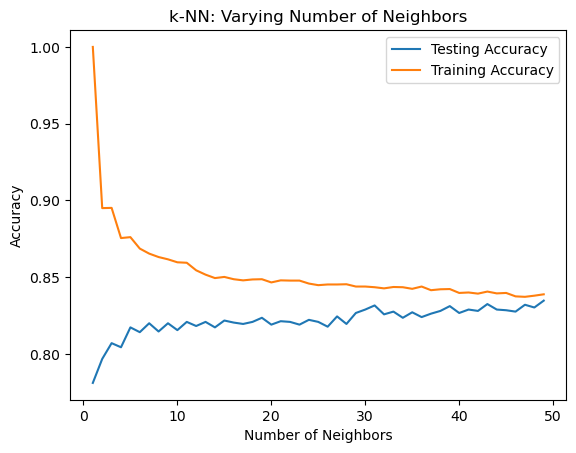

In [57]:
#Plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [59]:
#define knn and pipe
knn = KNeighborsClassifier(n_neighbors=22)
pipe = make_pipeline(StandardScaler(), knn)
#fit
pipe.fit(X_train, y_train)
#predict probabilities
pred_prob = pipe.predict_proba(X_test)
#generate AUC score
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

0.8885683750868909


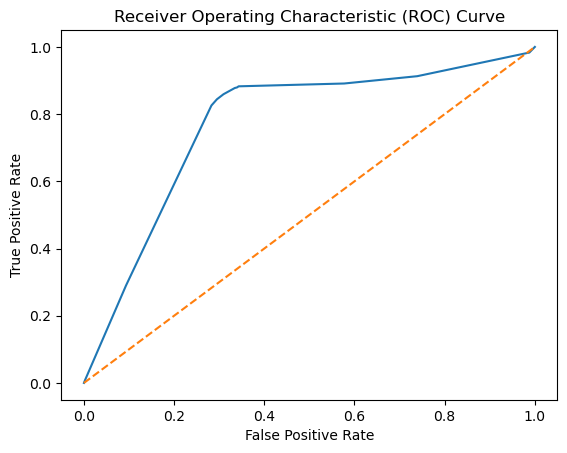

In [61]:
#find y_pred_prob for ROC Curve
y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()